In [1]:
## 상관분석

from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
iris = datasets.load_iris()

In [3]:
np.corrcoef(iris['data'][:,2], iris['data'][:,3])
# 상관계수 구하는 것

array([[1.        , 0.96286543],
       [0.96286543, 1.        ]])

In [4]:
iris_df = pd.DataFrame(iris['data'], columns = iris.feature_names)

In [5]:
iris_df['target'] = iris['target']

In [6]:
iris_df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [7]:
iris_df.iloc[:,:4].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [8]:
## 상관분석은, 선형이 아닌 곡선으로 이루어질경우 
## 상관계수가 낮게 나타나니까..

## 무조건 선형이어야만 높게 나옴

(4, 0)

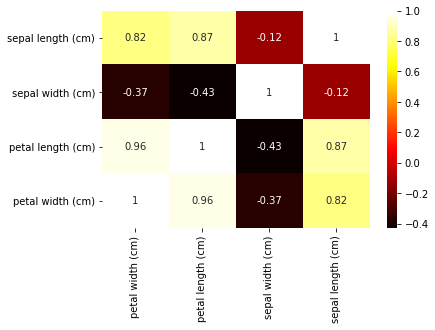

In [9]:
sns.heatmap(iris_df.iloc[:,:4].corr(), annot = True, cmap = 'hot')
plt.ylim([4,0])
plt.xlim([4,0])

In [10]:
from scipy import stats
import pandas as pd
import numpy as np

## 단일집단 t검정

단일집단의 평균이 어떤 특정한 집단의 평균과 차이가 있는지를 검정하는 방법

[예시] 환경 : 국내 생산 노트북 평균 사용시간이 5.2시간으로 파악된 상황, A회사 노트북 평균 사용시간과
차이가 있는지 검정하기 위해 150대를 랜덤 선정하여 검정 실시

- 귀무가설 : 평균 시간의 차이가 없다
- 대립가설 : 평균 시간의 차이가 있다

[절차] 
- 샤피로 테스트의 검정결과 유의수준 >0.05 이면 정규분포로 판단하고 t-test를 수행
- 그렇지 않은 경우, 월콕스 테스트를 진행

#### 사피르테스트의 귀무가설 : 해당 표본은 정규분포와 차이가 없다

In [11]:
np.random.seed(100)
one_sample = np.round(np.random.normal(5.1, 1, 150), 1)

In [12]:
one_sample

array([3.4, 5.4, 6.3, 4.8, 6.1, 5.6, 5.3, 4. , 4.9, 5.4, 4.6, 5.5, 4.5,
       5.9, 5.8, 5. , 4.6, 6.1, 4.7, 4. , 6.7, 6.6, 4.8, 4.3, 5.3, 6. ,
       5.8, 6.5, 4.8, 5.2, 5.3, 3.7, 4.3, 5.9, 5.9, 4.6, 6.3, 3.4, 3.7,
       3.9, 4.6, 4.4, 5.1, 4.5, 6.4, 3.4, 4.1, 5.5, 3.5, 6.6, 3.9, 4.6,
       4.2, 4.3, 5.2, 5.6, 4.2, 6.3, 5. , 4.2, 4.2, 5.1, 5.3, 5.1, 3.5,
       4.1, 5.7, 5.8, 6.1, 3.7, 3.3, 5.5, 4.8, 4.4, 7.1, 4.5, 5.9, 3.8,
       5.7, 4. , 5.8, 5.8, 3.5, 6. , 5.9, 5.5, 5.2, 5.1, 4.5, 3.9, 3.4,
       5.5, 7. , 4.7, 6.9, 5.1, 5. , 5.1, 4.9, 2.6, 3.4, 4. , 2.1, 5.1,
       4.9, 4.6, 5.2, 5.1, 5.4, 4.3, 3.8, 5.2, 4.7, 3.9, 4.7, 3.8, 6.7,
       5.8, 3.1, 5. , 3.6, 7.1, 3.7, 4. , 4.9, 3.7, 6. , 5.1, 6. , 5.9,
       3.6, 3.9, 6.4, 6.1, 3.9, 4.9, 3.6, 5.2, 5.8, 5.5, 3.7, 4.5, 5.9,
       4.7, 7.2, 4.8, 4.5, 5.9, 5.3, 4.8])

In [13]:
static, p = stats.shapiro(one_sample)

In [14]:
p

0.34463170170783997

In [15]:
# p-value가 0.344로 0.05보다 매우 크다 -> 귀무가설을 기각할 수 없다.
## 따라서 정규분포를 따른다고 판단

## T-test 수행

In [16]:
stats.ttest_1samp(one_sample, 5.2)

Ttest_1sampResult(statistic=-3.214946711763571, pvalue=0.0015999004385247693)

In [17]:
## t-test 실시 결과 p-value는 0.001 < 0.05 이므로,
## 귀무가설을 기각하고, 대립가설을 채택한다.

## 따라서 A사 노트북과 국내 생산 노트북의 평균 사용시간은 차이가 있다.

## 두 집단 평균 차이 검정

### levene()를 이용해 두 집단의 분포가 동질한지 검정하고,
- 동질하다면 equal_var = True 로 
- 동질하지 않으면 equal_var = False로 진행한다

[귀무가설] 두 집단의 분포는 차이가 없다(동질하다)

[예시] A공정을 통한 재료의 강도와 B공정을 통한 재료의 강도를 각각 50개의 표본으로 조사하였다

- 두 집단의 강도 차이가 있는가
- 귀무가설 : 두 집단의 평균은 차이가 없다

In [18]:
np.random.seed(50)
a = np.random.choice(range(100, 131), 50)
b = np.random.choice(range(90, 140), 50)

In [19]:
stats.levene(a,b)

LeveneResult(statistic=10.455556028067193, pvalue=0.0016668365977815334)

In [20]:
## p-value = 0.0016 < 0.05 이므로 두 집단의 분포는 동질하지 않다.
## --> equal_var = False

In [21]:
stats.ttest_ind(a,b, equal_var = False)

Ttest_indResult(statistic=-0.37348367924784004, pvalue=0.7097345147148231)

In [22]:
## p-value = 0.709 > 0.05 이므로 귀무가설을 채택한다. 

## 따라서 두 집단의 평균차이는 없다

## 카이제곱검정

In [23]:
ad = pd.read_csv('ad.csv')

In [24]:
ad

,광고,구입
0,B,하지 않았다
1,B,하지 않았다
2,A,했다
3,A,했다
4,B,하지 않았다
...,...,...
995,B,하지 않았다
996,B,하지 않았다
997,B,하지 않았다
998,B,하지 않았다


In [25]:
ad_cross = pd.crosstab(ad['광고'], ad['구입'])

In [26]:
ad_cross

구입,하지 않았다,했다
광고,,
A,351,49
B,549,51


In [27]:
## 광고와 구매가 관련이 있는가?

In [28]:
chi2_static = 81/360 + 81/40 + 81/540 + 81/60
chi2_static
## 9^2 / 평균 이런식으로

3.75

In [29]:
chi2, p, dof, ef = stats.chi2_contingency(ad_cross, correction = False)
## correction ?? p value 계산시 더 낮게 생성하는게 False

In [30]:
p ## 넘나 애매한 수치....

0.052807511416113395

In [31]:
ef

array([[360.,  40.],
       [540.,  60.]])

In [32]:
dof 
## degree of freedom ; 
### 여기선 했다가 정해지면 안했다가 정해지고 하는 식이니까 자유도 1

1

In [33]:
chi2

3.75

In [34]:
xs = np.linspace(0,10,50)

In [35]:
## 자유도가 1인 카이제곱분포 따르는 확률변수 생성
rv = stats.chi2(1)

In [36]:
## 유의수준 0.05일 때 카이제곱통계량
rv.isf(0.05)

3.8414588206941285

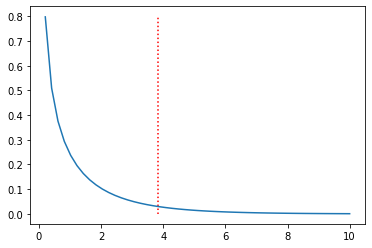

In [37]:
import matplotlib.pyplot as plt
plt.plot(xs, rv.pdf(xs))
plt.vlines(rv.isf(0.05), ymin = 0, ymax = 0.8, color = 'r', ls = ':')

In [38]:
## 빨간거 오른쪽은, 여기는 이럴 확률이 매우 낮아서, 귀무가설 기각이되고
## 왼쪽은 일어날 확률 높으니 귀무가설 채택

In [39]:
?plt.vlines
'''
Signature:
plt.vlines(
    x,
    ymin,
    ymax,
    colors='k',
    linestyles='solid',
    label='',
    *,
    data=None,
    **kwargs,
)
'''

"\nSignature:\nplt.vlines(\n    x,\n    ymin,\n    ymax,\n    colors='k',\n    linestyles='solid',\n    label='',\n    *,\n    data=None,\n    **kwargs,\n)\n"

Signature:
plt.vlines(
    x,
    ymin,
    ymax,
    colors='k',
    linestyles='solid',
    label='',
    *,
    data=None,
    **kwargs,
)
Docstring:
Plot vertical lines.

Plot vertical lines at each *x* from *ymin* to *ymax*.

Parameters
----------
x : scalar or 1D array_like
    x-indexes where to plot the lines.

ymin, ymax : scalar or 1D array_like
    Respective beginning and end of each line. If scalars are
    provided, all lines will have same length.

colors : array_like of colors, optional, default: 'k'

linestyles : {'solid', 'dashed', 'dashdot', 'dotted'}, optional

label : string, optional, default: ''

Returns
-------
lines : `~matplotlib.collections.LineCollection`

Other Parameters
----------------
**kwargs : `~matplotlib.collections.LineCollection` properties.

See also
--------
hlines : horizontal lines
axvline: vertical line across the axes

Notes
-----


.. note::
    In addition to the above described arguments, this function can take a
    **data** keyword argu

In [40]:
## 주사위게임 : 일원카이제곱
## 나를 골탕먹이는 친구A가 가져온 주사위로 몰래 혼자 게임을 실시해보았다
## 나는 이 주사위로 A와 내기를 해야할까?

In [41]:
freq = [16, 7, 7, 15, 11, 4]

In [42]:
stats.chisquare(freq)

Power_divergenceResult(statistic=11.6, pvalue=0.040699388504049985)

In [43]:
## 카이제곱통계량 구하기
np.sum((np.array(freq) - 10)**2 / 10)
## 자유도는 5  
## (6-1 인게, 다시 샘플링 해도 5개 정해지면 마지막 freq6번째꺼는 정해지니까)

11.6

In [44]:
## p-value 는 0.04<0.05 이므로 관측빈도와 기대빈도는 차이가 없다는 
## 귀무가설이 의심된다

## A가 주사위를 조작하지는 않았을까?

In [45]:
xs = np.linspace(0,30,100)

In [46]:
## 자유도가 1인 카이제곱분포를 따르는 확률변수 생성
rv = stats.chi2(5)

In [47]:
## 유의수준 0.05일 때 카이제곱통계량
rv.isf(0.05)

11.070497693516355

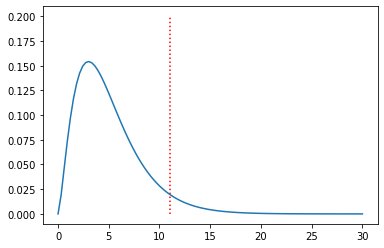

In [48]:
plt.plot(xs, rv.pdf(xs))
plt.vlines(rv.isf(0.05), ymin = 0, ymax = 0.2, color = 'r', ls = ':')

---

[연습문제]

교수님 답안


In [55]:
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

### [Q1. 부모의 학력과 자녀의 대학진학여부 관계 검토]

In [56]:
df = pd.read_csv("cleanDescriptive.csv", sep = ',', header = 0, 
                encoding='ansi')

df.head(4)

,resident,gender,age,level,cost,type,survey,pass,cost2,resident2,gender2,age2,level2,pass2
0,1.0,1,50,1.0,5.1,1.0,1.0,2.0,2.0,특별시,남자,장년층,고졸,실패
1,2.0,1,54,2.0,4.2,1.0,2.0,2.0,2.0,광역시,남자,장년층,대졸,실패
2,NaN,1,62,2.0,4.7,1.0,1.0,1.0,2.0,NaN,남자,노년층,대졸,합격
3,4.0,2,50,NaN,3.5,1.0,4.0,1.0,NaN,광역시,여자,장년층,NaN,합격


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   resident   231 non-null    float64
 1   gender     248 non-null    int64  
 2   age        248 non-null    int64  
 3   level      236 non-null    float64
 4   cost       248 non-null    float64
 5   type       235 non-null    float64
 6   survey     160 non-null    float64
 7   pass       235 non-null    float64
 8   cost2      165 non-null    float64
 9   resident2  231 non-null    object 
 10  gender2    248 non-null    object 
 11  age2       248 non-null    object 
 12  level2     236 non-null    object 
 13  pass2      235 non-null    object 
dtypes: float64(7), int64(2), object(5)
memory usage: 27.2+ KB


In [58]:
df2 = df[['level2','pass2']]

In [59]:
np.bincount(df2['level2'].isnull())

array([236,  12], dtype=int64)

In [60]:
df3 = df2.dropna(how = 'any')

In [61]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 0 to 247
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   level2  225 non-null    object
 1   pass2   225 non-null    object
dtypes: object(2)
memory usage: 5.3+ KB


In [62]:
pd.crosstab(df3.level2, df3.pass2)

pass2,실패,합격
level2,,
고졸,40,49
대졸,27,55
대학원졸,23,31


- 귀무가설 : 부모의 학력과 자녀의 대학진학여부는 관련이 없다(독립이다)
- 대립가설 : 부모의 학력과 자녀의 대학진학여부는 관련이 있다

In [63]:
chi2, p, dof, ef = stats.chi2_contingency(pd.crosstab(df3.level2, df3.pass2),
                                         correction=False)

In [64]:
p

0.25070568406521354

In [65]:
ef

array([[35.6, 53.4],
       [32.8, 49.2],
       [21.6, 32.4]])

부모의 학력과 자녀의 대학진학여부의 카이제곱 독립성 검정결과 유의확률 0.25 > 0.05이므로 귀무가설을 기각할 수 없고, <u>**부모의 학력과 자녀의 대학진학여부는 관련이 없다**</u>

---
본인 풀이

In [51]:
aa = pd.read_csv('cleanDescriptive.csv', sep = ',', header = 0, encoding = 'ansi')

In [52]:
aa.head(5)

,resident,gender,age,level,cost,type,survey,pass,cost2,resident2,gender2,age2,level2,pass2
0,1.0,1,50,1.0,5.1,1.0,1.0,2.0,2.0,특별시,남자,장년층,고졸,실패
1,2.0,1,54,2.0,4.2,1.0,2.0,2.0,2.0,광역시,남자,장년층,대졸,실패
2,NaN,1,62,2.0,4.7,1.0,1.0,1.0,2.0,NaN,남자,노년층,대졸,합격
3,4.0,2,50,NaN,3.5,1.0,4.0,1.0,NaN,광역시,여자,장년층,NaN,합격
4,5.0,1,51,1.0,5.0,1.0,3.0,1.0,2.0,시구군,남자,장년층,고졸,합격


In [53]:
aa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   resident   231 non-null    float64
 1   gender     248 non-null    int64  
 2   age        248 non-null    int64  
 3   level      236 non-null    float64
 4   cost       248 non-null    float64
 5   type       235 non-null    float64
 6   survey     160 non-null    float64
 7   pass       235 non-null    float64
 8   cost2      165 non-null    float64
 9   resident2  231 non-null    object 
 10  gender2    248 non-null    object 
 11  age2       248 non-null    object 
 12  level2     236 non-null    object 
 13  pass2      235 non-null    object 
dtypes: float64(7), int64(2), object(5)
memory usage: 27.2+ KB


In [53]:
aa_cross = pd.crosstab(aa['level2'], aa['pass2'])

In [54]:
aa_cross

pass2,실패,합격
level2,,
고졸,40,49
대졸,27,55
대학원졸,23,31


In [55]:
## 89 / 82 / 54
## 

In [56]:
chi2, p, dof, ef = stats.chi2_contingency(aa_cross, correction = False)
## correction ?? p value 계산시 더 낮게 생성하는게 False

p ## 

0.25070568406521354

In [57]:
## p = 0.25 > 0.05 이므로 
## 귀무가설 채택 = 부모 학력수준 자식 진학률에 관련 없음

### [Q2. diamonds]

2-1) price와 상관성이 높은 변수는?  
2-2) price 변수의 확률밀도함수로 분포 확인  
2-3) 아래의 조건에 따라 price2변수를 범주형 변수로 생성  
- 1분위수 미만: 'low'
- iqr : 'mid'
- 윗 극단치 경계 이하 : 'high'
- 15000미만 : 'vh' (very high)
- 그 이상 : 'sp' (special)

2-4) cut 변수와 price2변수는 서로 관련이 있는지 판단

- pip install seaborn --upgrade

In [66]:
dia = sns.load_dataset('diamonds')

In [67]:
dia_numeric = dia[['carat']].join(dia.iloc[:,4:])

In [68]:
dia_numeric.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


(0, 7)

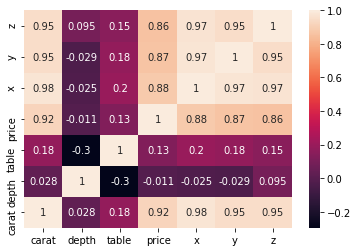

In [69]:
sns.heatmap(dia_numeric.corr(), annot = True)
plt.ylim([0,7])

[상관분석 결과]

가격과 가장 상관성이 높은 변수는 carat이며, carat과 다이아몬드 크기와 관련된 변수인 x, y, z의 상관성이 각각 0.98, 0.95, 0.95로 매우 높게 나타났다.

[교차분석]

- cut과 color의 관계는?

In [71]:
pd.crosstab(dia['cut'], dia['color'])

color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,2834,3903,3826,4884,3115,2093,896
Premium,1603,2337,2331,2924,2360,1428,808
Very Good,1513,2400,2164,2299,1824,1204,678
Good,662,933,909,871,702,522,307
Fair,163,224,312,314,303,175,119


In [72]:
chi, p, dof, ef = stats.chi2_contingency(pd.crosstab(dia['cut'], dia['color']))

In [73]:
p

1.3945120919852248e-51

p-value는 현저히 낮게 나타났고 cut과 color 변수간 관계가 없다(독립적이다)는 귀무가설을 기각한다. 

따라서 cut과 color 두 변수는 서로 관련이 있다.

---
본인 풀이

In [83]:
bb = sns.load_dataset('diamonds')

In [84]:
bb

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [85]:
bb.corr()['price'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of carat    0.921591
depth   -0.010647
table    0.127134
price    1.000000
x        0.884435
y        0.865421
z        0.861249
Name: price, dtype: float64>

[상관분석 결과]

가격과 가장 상관성이 높은 변수는 carat

---

cf) pandas category 타입의 numeric 변환

In [86]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [87]:
dia['cut'] = dia['cut'].astype('category')

In [88]:
dia['cut'].cat.codes

0        0
1        1
2        3
3        1
4        3
        ..
53935    0
53936    3
53937    2
53938    1
53939    0
Length: 53940, dtype: int8

In [89]:
dia['cut']

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

---

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Suppor

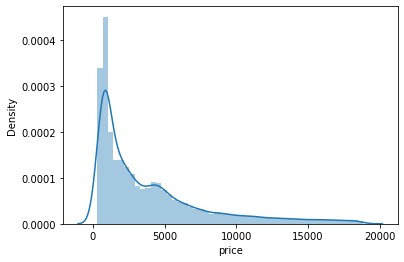

In [95]:
sns.distplot(dia['price'])

In [90]:
import scipy as sp
import scipy.stats

In [91]:
bb.price.describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


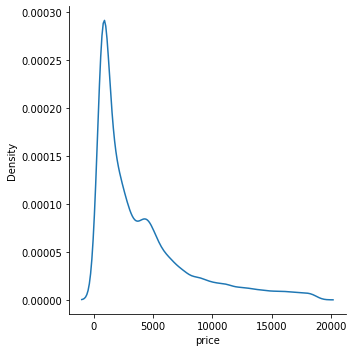

In [94]:
sns.displot(bb['price'], kind='kde')

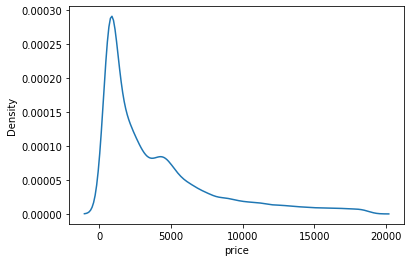

In [65]:
sns.kdeplot(bb['price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x24b5dfa44c8>,
 'caps': [<matplotlib.lines.Line2D at 0x24b5dfa4d88>,
 'boxes': [<matplotlib.lines.Line2D at 0x24b5dfa0a88>],
 'medians': [<matplotlib.lines.Line2D at 0x24b5dfa8d08>],
 'fliers': [<matplotlib.lines.Line2D at 0x24b5dfaeb88>],
 'means': []}

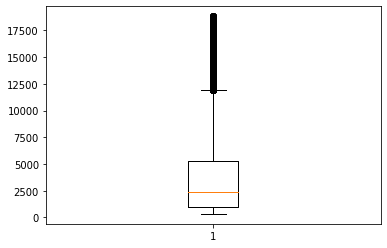

In [96]:
plt.boxplot(dia['price'])

In [97]:
dia.describe()['price']

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [98]:
p_low = dia.describe()['price'].loc['25%']
p_mid = dia.describe()['price'].loc['75%'] - dia.describe()['price'].loc['25%']
p_high = dia.describe()['price'].loc['75%'] + 1.5*p_mid

윗수염경계 밖 이상치 분포 확인

In [99]:
dia['price'][(dia['price'] >= p_high)]

23820    11886
23821    11886
23822    11888
23823    11888
23824    11888
         ...  
27745    18803
27746    18804
27747    18806
27748    18818
27749    18823
Name: price, Length: 3540, dtype: int64

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Suppor

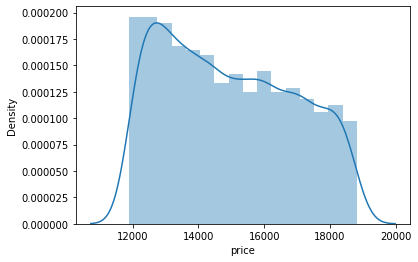

In [100]:
sns.distplot(dia['price'][(dia['price'] >= p_high)])

In [101]:
dia['price'][(dia['price'] >= p_high)&(dia['price'] < 15000)]

23820    11886
23821    11886
23822    11888
23823    11888
23824    11888
         ...  
25879    14982
25880    14982
25881    14982
25882    14998
25883    14998
Name: price, Length: 1884, dtype: int64

윗수염경계 밖의 이상치는 전체 3540개가 위치하고 있으며, 대략 그 빈도를 절반으로 나누는 15000을 `very high`(vh)와 `special`(sp)로 결정

In [102]:
dia['price2'] = np.where(dia['price']<p_low,'low',
                         np.where(dia['price']<p_mid,'mid',
                                  np.where(dia['price']<p_high,'high',
                                          np.where(dia['price']<15000,'vh','sp'))))

In [103]:
pd.crosstab(dia['cut'],dia['price2'])[['low','mid','high','vh','sp']]

price2,low,mid,high,vh,sp
cut,,,,,
Ideal,6304,9482,4606,627,532
Premium,2905,5328,4300,671,587
Very Good,3129,4867,3329,390,367
Good,1057,2245,1339,136,129
Fair,88,980,441,60,41


In [104]:
chi2, p, dof, ef = stats.chi2_contingency(pd.crosstab(dia['cut'],dia['price2']))

In [105]:
chi2

1262.7018754393625

In [106]:
p

5.153130778705806e-259

In [107]:
ef

array([[5599.50435669, 5386.95092696, 9150.18542825,  661.63248053,
         752.72680756],
       [3583.25667408, 3447.23865406, 5855.42235818,  423.39443826,
         481.68787542],
       [3139.21449759, 3020.05202076, 5129.81023359,  370.92680756,
         421.99644049],
       [1274.70504264, 1226.31809418, 2083.00355951,  150.61802002,
         171.35528365],
       [ 418.319429  ,  402.44030404,  683.57842047,   49.42825362,
          56.23359288]])

In [108]:
pd.crosstab(dia['cut'],dia['price2'], margins = True)

price2,high,low,mid,sp,vh,All
cut,,,,,,
Ideal,4606,6304,9482,532,627,21551
Premium,4300,2905,5328,587,671,13791
Very Good,3329,3129,4867,367,390,12082
Good,1339,1057,2245,129,136,4906
Fair,441,88,980,41,60,1610
All,14015,13483,22902,1656,1884,53940


In [109]:
xs = np.linspace(0,50,200)

In [110]:
# 자유도가 16인 카이제곱분포를 따르는 확률변수 생성
rv = stats.chi2(16)

In [111]:
# 유의수준 0.05일 때 카이제곱통계량
rv.isf(0.05)

26.296227604864242

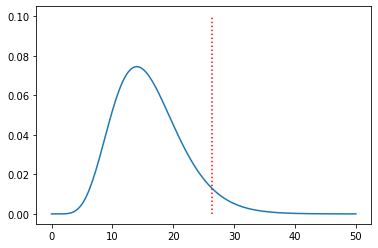

In [112]:
plt.plot(xs, rv.pdf(xs))
plt.vlines(rv.isf(0.05), ymin = 0, ymax = 0.1, color = 'r', ls = ':')

cf) categoricalDtype
- 범주형 변수의 범주 순서 지정(서열척도 가능)

In [113]:
from pandas.api.types import CategoricalDtype

In [114]:
price_cat_type = CategoricalDtype(categories = ['low','mid','high','vh','sp'], ordered = False)

In [115]:
dia['price3'] = dia['price2'].astype(price_cat_type)

In [116]:
pd.crosstab(dia['cut'],dia['price3'], margins = True)

price3,low,mid,high,vh,sp,All
cut,,,,,,
Ideal,6304,9482,4606,627,532,21551
Premium,2905,5328,4300,671,587,13791
Very Good,3129,4867,3329,390,367,12082
Good,1057,2245,1339,136,129,4906
Fair,88,980,441,60,41,1610
All,13483,22902,14015,1884,1656,53940


In [117]:
_,p,_,ef = stats.chi2_contingency(pd.crosstab(dia['cut'],dia['price3']))

In [118]:
p

5.153130778705806e-259

In [119]:
ef

array([[5386.95092696, 9150.18542825, 5599.50435669,  752.72680756,
         661.63248053],
       [3447.23865406, 5855.42235818, 3583.25667408,  481.68787542,
         423.39443826],
       [3020.05202076, 5129.81023359, 3139.21449759,  421.99644049,
         370.92680756],
       [1226.31809418, 2083.00355951, 1274.70504264,  171.35528365,
         150.61802002],
       [ 402.44030404,  683.57842047,  418.319429  ,   56.23359288,
          49.42825362]])

Q) 'Ideal' & 'low' 등급의 기대빈도를 계산해보세요

In [120]:
13483 * (21551/53940)

5386.950926955877

cut과 범주형으로 변환한 price3 간의 교차분석 및 카이제곱 검정을 실시한 결과  
p-value는 5.153130778705806e-259로 매우 작아 귀무가설을 기각한다.  

**따라서, cut변수와 price3변수는 서로 독립적이지 않다.**

---

In [67]:
## 2-3
A = pd.DataFrame(np.where(bb['price'] < bb.price.describe()['25%'], 'low',
                np.where(bb['price'] < bb.price.describe()['75%'], 'mid',
                        np.where(bb['price'] <= (bb.price.describe()['75%'] +\
                                                (bb.price.describe()['75%'] -\
                                                 bb.price.describe()['25%'])*1.5),
                                'high',
                                 np.where(bb['price']<15000, 'vh', 'sp')))))

In [68]:
A.columns = ['price2']

In [75]:
A

,price2
0,low
1,low
2,low
3,low
4,low
...,...
53935,mid
53936,mid
53937,mid
53938,mid


In [76]:
pd.crosstab(A.index, A.price2)

price2,high,low,mid,sp,vh
row_0,,,,,
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
53935,0,0,1,0,0
53936,0,0,1,0,0
53937,0,0,1,0,0


In [77]:
bb['price2'] = A['price2']

In [78]:
bb

,carat,cut,color,clarity,depth,table,price,x,y,z,price2
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,low
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,low
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,low
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,low
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,low
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,mid
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,mid
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,mid
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,mid


In [79]:
# 2-4) cut 변수와 price2변수는 서로 관련이 있는지 판단

C = pd.crosstab(bb['cut'], bb['price2'])

In [80]:
C

price2,high,low,mid,sp,vh
cut,,,,,
Ideal,3443,6304,10645,532,627
Premium,3053,2905,6575,587,671
Very Good,2294,3129,5902,367,390
Good,863,1057,2721,129,136
Fair,292,88,1129,41,60


In [81]:
chi2, p, dof, ef = stats.chi2_contingency(C, correction = False)


In [82]:
p ## 매우낮네 -> 귀무가설 기각

1.4405308712486761e-217

In [83]:
dof

16

In [84]:
chi2

1069.5132514820355

In [85]:
sns.__version__

'0.11.1'